In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv1D, MaxPooling1D, Flatten, Dropout, concatenate, BatchNormalization, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import mat73

In [2]:
feat = pd.read_csv('5features.csv')
feat.head()

,SA,PW,PI,p2p,IPA,Systolic,Diastolic
0,1.765396,23.0,63,62,5.713242,123.038299,66.525670
1,1.754643,22.0,62,63,4.314574,120.986846,65.597632
2,1.687195,21.0,62,61,3.575851,118.349265,66.134917
3,1.663734,19.0,61,61,3.653908,119.570367,66.134917
4,1.700880,23.0,62,63,3.644366,122.354481,67.502552


In [3]:
x = feat.values[:,0:5]
y = feat.values[:,5:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5)

In [4]:
# Dense Model Trained off of 5 Features Extracted from Data
inputs = Input(shape=(5), name='InputFeat')
hidden = Dense(24, name = 'Hidden', activation='linear')(inputs)
hidden1 = Dense(128, name = 'Hidden1', activation='linear')(hidden)
hidden2 = Dense(256, name ='Hidden2', activation='tanh')(hidden1)
hidden3 = Dense(512, name = 'Hidden3', activation='linear')(hidden2)
hidden4 = Dense(1024, name = 'Hidden4', activation='linear')(hidden3)
hidden5 = Dense(512, name = 'Hidden5', activation = 'relu')(hidden4)
hidden6 = Dense(256, name = 'Hidden6', activation = 'relu')(hidden5)
hidden7 = Dense(128, name = 'Hidden7', activation = 'relu')(hidden6)
hidden8 = Dense(64, name = 'Hidden8', activation = 'relu')(hidden7)
output = Dense(2, name='Output')(hidden8)
model = Model(inputs = inputs, outputs = output, name='Sequential')
print(model.summary())

Model: "Sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputFeat (InputLayer)       [(None, 5)]               0         
_________________________________________________________________
Hidden (Dense)               (None, 24)                144       
_________________________________________________________________
Hidden1 (Dense)              (None, 128)               3200      
_________________________________________________________________
Hidden2 (Dense)              (None, 256)               33024     
_________________________________________________________________
Hidden3 (Dense)              (None, 512)               131584    
_________________________________________________________________
Hidden4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
Hidden5 (Dense)              (None, 512)               5

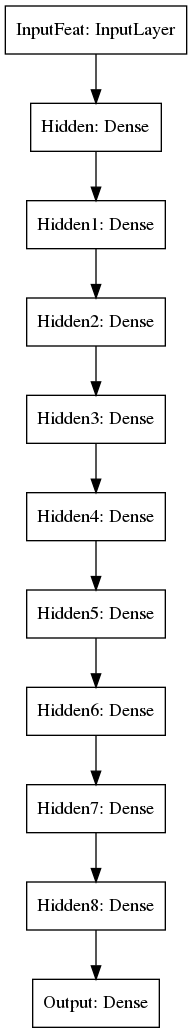

In [45]:
plot_model(model, to_file='denseModel.png')

In [104]:
opt = tf.keras.optimizers.Adam(1e-5)
opt.learning_rate.assign(1e-5)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-05>

In [105]:
model.compile(optimizer=opt, loss="mse")

In [106]:
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 9ms/step - loss: 11234.4170 - val_loss: 11005.4756
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 10978.7959 - val_loss: 10730.0098
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 10667.7939 - val_loss: 10368.8926
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 10241.5762 - val_loss: 9853.8867
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 9614.3535 - val_loss: 9077.2451
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 8687.4922 - val_loss: 7969.7212
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 7402.6436 - val_loss: 6471.9556
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 5730.5952 - val_loss: 4662.0562
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 3881.5852 - val_loss: 2856.3362
Epoch 10/100
23/23 [============================

Epoch 81/100
23/23 [==============================] - 0s 5ms/step - loss: 37.1739 - val_loss: 27.3279
Epoch 82/100
23/23 [==============================] - 0s 5ms/step - loss: 37.2647 - val_loss: 27.2959
Epoch 83/100
23/23 [==============================] - 0s 5ms/step - loss: 37.2088 - val_loss: 27.5069
Epoch 84/100
23/23 [==============================] - 0s 5ms/step - loss: 37.3196 - val_loss: 27.3218
Epoch 85/100
23/23 [==============================] - 0s 5ms/step - loss: 37.2450 - val_loss: 27.5007
Epoch 86/100
23/23 [==============================] - 0s 5ms/step - loss: 37.1226 - val_loss: 27.3159
Epoch 87/100
23/23 [==============================] - 0s 5ms/step - loss: 37.3905 - val_loss: 27.2935
Epoch 88/100
23/23 [==============================] - 0s 5ms/step - loss: 37.2691 - val_loss: 27.3821
Epoch 89/100
23/23 [==============================] - 0s 5ms/step - loss: 37.1697 - val_loss: 27.4739
Epoch 90/100
23/23 [==============================] - 0s 5ms/step - loss: 37.4081 

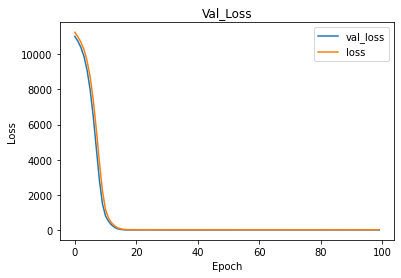

In [108]:
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['loss'], label='loss')
plt.legend()
plt.title("Val_Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [99]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 29.1397


29.139728546142578

In [100]:
predict = model.predict(x_train)
print(predict)

[[132.12508   72.981606]
 [133.7376    73.86207 ]
 [131.31943   72.497696]
 ...
 [131.53447   72.67397 ]
 [130.94975   72.69345 ]
 [130.29439   72.03798 ]]


In [101]:
print(y_train)

[[133.34440466  72.48465074]
 [138.66841203  76.73408781]
 [125.57819208  66.81873464]
 ...
 [121.62181964  66.23260539]
 [143.25975783  77.46674938]
 [143.60166656  78.24825504]]


In [5]:
# Extract PPG data into CSV files
orig = mat73.loadmat(r'data/Part_1.mat')

In [6]:
# Only using Part_1 right now, will expand this to Part 1-3 after the concatenation of everything
ppg = orig['Part_1'][0][0]
abp = orig['Part_1'][0][1]

In [7]:
# Export the current feature list into CSV file # DONT RUN AGAIN ALREADY HAVE FILE
df = pd.DataFrame({'y': ppg, 'ABP': abp})
df.to_csv("smallPPG.csv", index=True, index_label='x')

In [8]:
# Read new CSV file with PPG and ABP
data = pd.read_csv('smallPPG.csv')
len(data)

61000

In [9]:
data

,x,y,ABP
0,0,1.759531,67.062955
1,1,1.718475,69.358628
2,2,1.684262,75.366453
3,3,1.657869,85.037586
4,4,1.637341,96.222885
...,...,...,...
60995,60995,1.771261,74.438415
60996,60996,1.700880,74.536103
60997,60997,1.644184,76.441023
60998,60998,1.600196,81.813875


In [18]:
Scaler = MinMaxScaler()
Scaler.fit_transform(data)

array([[0.00000000e+00, 4.39667807e-01, 1.53709462e-01],
       [1.63937114e-05, 4.29408891e-01, 1.74589072e-01],
       [3.27874227e-05, 4.20859795e-01, 2.29231453e-01],
       ...,
       [9.99967213e-01, 4.10845139e-01, 2.39004887e-01],
       [9.99983606e-01, 3.99853444e-01, 2.87872057e-01],
       [1.00000000e+00, 3.91304348e-01, 3.74944469e-01]])

In [49]:
# PPG to ABP Testing Network DO NOT USE
x1 = data.values[:,0:2]
y1 = data.values[:,2:]
x1 = np.expand_dims(x1, axis=2)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3)
x_valid1, x_test1, y_valid1, y_test1 = train_test_split(x_test1, y_test1, test_size = 0.5)

In [50]:
optConv = tf.keras.optimizers.Adam(0.001)
optConv.learning_rate.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

In [51]:
n_timesteps, n_features, n_outputs = x_train1.shape[1], x_train1.shape[2], y_train1.shape[1]

In [22]:
# PPG to ABP Neural Network (Not using, just testing)
inputs = Input(shape=(n_timesteps, n_features), name='InputPPG')
conv1 = Conv1D(filters = 256, kernel_size = 1, activation = 'relu')(inputs)
pool1 = MaxPooling1D(pool_size = 2)(conv1)
dense1 = Dense(64, activation='relu')(pool1)
conv2 = Conv1D(filters = 256, kernel_size = 1, activation = 'relu')(dense1)
pool2 = MaxPooling1D(pool_size = 2, padding="same")(conv2)
flatten = Flatten()(pool2)
output = Dense(n_outputs, activation='linear')(flatten)
model1 = Model(inputs = inputs, outputs = output, name='SBP')
print(model1.summary())

Model: "SBP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputPPG (InputLayer)        [(None, 2, 1)]            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 2, 256)            512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 256)            0         
_________________________________________________________________
dense (Dense)                (None, 1, 64)             16448     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 256)            16640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0       

In [23]:
model1.compile(optimizer=optConv, loss="mse")

In [73]:
model1.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs=10)

Epoch 1/10
1335/1335 [==============================] - 3s 2ms/step - loss: 17512.6445 - val_loss: 2476.3184
Epoch 2/10
1335/1335 [==============================] - 3s 2ms/step - loss: 2477.9521 - val_loss: 2484.8906
Epoch 3/10
1335/1335 [==============================] - 3s 2ms/step - loss: 2518.5288 - val_loss: 2493.4529
Epoch 4/10
1335/1335 [==============================] - 3s 2ms/step - loss: 2534.2229 - val_loss: 2331.5405
Epoch 5/10
1335/1335 [==============================] - 3s 2ms/step - loss: 2445.5776 - val_loss: 2456.6677
Epoch 6/10
1335/1335 [==============================] - 3s 2ms/step - loss: 2435.1392 - val_loss: 2178.0410
Epoch 7/10
1335/1335 [==============================] - 3s 2ms/step - loss: 2269.9246 - val_loss: 2183.7925
Epoch 8/10
1335/1335 [==============================] - 3s 2ms/step - loss: 2239.0571 - val_loss: 2061.6304
Epoch 9/10
1335/1335 [==============================] - 3s 2ms/step - loss: 2212.1675 - val_loss: 2020.3732
Epoch 10/10
1335/1335 [====

In [74]:
model1.evaluate(x_test1, y_test1)

286/286 [==============================] - 0s 960us/step - loss: 2307.0203


2307.020263671875

In [10]:
# Loading the data created in the feature extraction file
ppg_window = np.load('ppg_windows.npy')
sbp = np.load('sbp.npy')
dbp = np.load('dbp.npy')

In [11]:
# Setting the target to SBP from PPG_Window data 
# FOR SBP MODEL
x2 = ppg_window
y2 = sbp
x2 = np.expand_dims(x2, axis=2)
y2 = np.expand_dims(y2, axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.3)
x_valid2, x_test2, y_valid2, y_test2 = train_test_split(x_test2, y_test2, test_size = 0.5)

In [12]:
optConvSBP = tf.keras.optimizers.Adam(0.001)
optConvSBP.learning_rate.assign(0.00001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-05>

In [101]:
n_timestepsSBP, n_featuresSBP, n_outputsSBP = x_train2.shape[1], x_train2.shape[2], y_train2.shape[1]

In [102]:
sbp_inputs = Input(shape=(n_timestepsSBP, n_featuresSBP), name='InputSBP')
batch_n = BatchNormalization()(sbp_inputs)
conv1 = Conv1D(filters = 256, kernel_size = 1, activation = 'relu')(batch_n)
pool1 = MaxPooling1D(pool_size = 2)(conv1)
dense1 = Dense(3, activation='relu')(pool1)
conv2 = Conv1D(input_shape=(n_timestepsSBP, n_outputsSBP), filters = 64, kernel_size = 1, activation = 'relu')(dense1)
pool2 = MaxPooling1D(pool_size = 2)(conv2)
conv3 = Conv1D(input_shape=(n_timestepsSBP, n_outputsSBP), filters = 128, kernel_size = 1, activation = 'relu')(pool2)
pool3 = MaxPooling1D(pool_size = 2)(conv3)
conv4 = Conv1D(input_shape=(n_timestepsSBP, n_outputsSBP), filters = 128, kernel_size = 1, activation = 'relu')(pool3)
pool4 = MaxPooling1D(pool_size = 2)(conv4)
flat2 = Flatten()(pool4)
dense2 = Dense(64, activation='relu')(flat2)
output = Dense(n_outputsSBP, activation='linear', name = 'outputSBP')(dense2)
window = Model(inputs = sbp_inputs, outputs = output, name='SBP')
print(window.summary())

Model: "SBP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputSBP (InputLayer)        [(None, 180, 1)]          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 180, 1)            4         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 180, 256)          512       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 90, 256)           0         
_________________________________________________________________
dense_46 (Dense)             (None, 90, 3)             771       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 90, 64)            256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 45, 64)            0       

In [158]:
window.compile(optimizer=optConvSBP, loss="mse")
wind = window.fit(x_train2, y_train2, validation_data = (x_test2, y_test2), batch_size = 32, epochs=1000)

Epoch 1/1000
8/8 [==============================] - 0s 26ms/step - loss: 14570.4092 - val_loss: 14774.3955
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 14410.6768 - val_loss: 14562.6650
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 14185.8662 - val_loss: 14316.9336
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 13938.7412 - val_loss: 14056.8379
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 13680.9180 - val_loss: 13790.3330
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 13417.2832 - val_loss: 13519.0957
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 13150.8838 - val_loss: 13246.8887
Epoch 8/1000
8/8 [==============================] - 0s 9ms/step - loss: 12882.8027 - val_loss: 12970.3896
Epoch 9/1000
8/8 [==============================] - 0s 9ms/step - loss: 12612.3916 - val_loss: 12692.2305
Epoch 10/1000
8/8 [=======================

Epoch 79/1000
8/8 [==============================] - 0s 9ms/step - loss: 205.6985 - val_loss: 160.2632
Epoch 80/1000
8/8 [==============================] - 0s 9ms/step - loss: 187.4898 - val_loss: 148.7115
Epoch 81/1000
8/8 [==============================] - 0s 10ms/step - loss: 177.0956 - val_loss: 137.9864
Epoch 82/1000
8/8 [==============================] - 0s 9ms/step - loss: 172.7688 - val_loss: 128.7378
Epoch 83/1000
8/8 [==============================] - 0s 9ms/step - loss: 159.1969 - val_loss: 120.2901
Epoch 84/1000
8/8 [==============================] - 0s 9ms/step - loss: 154.3768 - val_loss: 113.0475
Epoch 85/1000
8/8 [==============================] - 0s 9ms/step - loss: 150.2805 - val_loss: 106.7886
Epoch 86/1000
8/8 [==============================] - 0s 9ms/step - loss: 140.3056 - val_loss: 101.2623
Epoch 87/1000
8/8 [==============================] - 0s 10ms/step - loss: 138.0212 - val_loss: 96.4008
Epoch 88/1000
8/8 [==============================] - 0s 10ms/step - loss

8/8 [==============================] - 0s 9ms/step - loss: 101.1497 - val_loss: 65.3266
Epoch 238/1000
8/8 [==============================] - 0s 10ms/step - loss: 104.0143 - val_loss: 65.2964
Epoch 239/1000
8/8 [==============================] - 0s 10ms/step - loss: 103.8964 - val_loss: 65.2754
Epoch 240/1000
8/8 [==============================] - 0s 10ms/step - loss: 102.3053 - val_loss: 65.2491
Epoch 241/1000
8/8 [==============================] - 0s 9ms/step - loss: 103.1473 - val_loss: 65.2375
Epoch 242/1000
8/8 [==============================] - 0s 9ms/step - loss: 102.4354 - val_loss: 65.2009
Epoch 243/1000
8/8 [==============================] - 0s 9ms/step - loss: 101.7486 - val_loss: 65.1731
Epoch 244/1000
8/8 [==============================] - 0s 9ms/step - loss: 102.4354 - val_loss: 65.1412
Epoch 245/1000
8/8 [==============================] - 0s 10ms/step - loss: 101.0467 - val_loss: 65.1016
Epoch 246/1000
8/8 [==============================] - 0s 10ms/step - loss: 101.9802 

8/8 [==============================] - 0s 9ms/step - loss: 91.7922 - val_loss: 61.2618
Epoch 397/1000
8/8 [==============================] - 0s 9ms/step - loss: 95.5531 - val_loss: 61.2059
Epoch 398/1000
8/8 [==============================] - 0s 9ms/step - loss: 97.4356 - val_loss: 61.2312
Epoch 399/1000
8/8 [==============================] - 0s 10ms/step - loss: 96.2624 - val_loss: 61.2044
Epoch 400/1000
8/8 [==============================] - 0s 9ms/step - loss: 96.0139 - val_loss: 61.1653
Epoch 401/1000
8/8 [==============================] - 0s 10ms/step - loss: 96.4097 - val_loss: 61.0602
Epoch 402/1000
8/8 [==============================] - 0s 10ms/step - loss: 95.0513 - val_loss: 60.9634
Epoch 403/1000
8/8 [==============================] - 0s 10ms/step - loss: 92.5436 - val_loss: 60.9360
Epoch 404/1000
8/8 [==============================] - 0s 9ms/step - loss: 93.6391 - val_loss: 60.8902
Epoch 405/1000
8/8 [==============================] - 0s 10ms/step - loss: 95.3417 - val_loss

8/8 [==============================] - 0s 9ms/step - loss: 91.6977 - val_loss: 58.8958
Epoch 477/1000
8/8 [==============================] - 0s 10ms/step - loss: 90.1837 - val_loss: 58.8668
Epoch 478/1000
8/8 [==============================] - 0s 10ms/step - loss: 91.5407 - val_loss: 58.8709
Epoch 479/1000
8/8 [==============================] - 0s 10ms/step - loss: 90.7654 - val_loss: 58.8970
Epoch 480/1000
8/8 [==============================] - 0s 9ms/step - loss: 89.3115 - val_loss: 58.8787
Epoch 481/1000
8/8 [==============================] - 0s 9ms/step - loss: 86.8731 - val_loss: 58.8095
Epoch 482/1000
8/8 [==============================] - 0s 9ms/step - loss: 93.0355 - val_loss: 58.7737
Epoch 483/1000
8/8 [==============================] - 0s 10ms/step - loss: 92.7407 - val_loss: 58.6932
Epoch 484/1000
8/8 [==============================] - 0s 9ms/step - loss: 93.1975 - val_loss: 58.6567
Epoch 485/1000
8/8 [==============================] - 0s 10ms/step - loss: 90.7142 - val_loss

8/8 [==============================] - 0s 9ms/step - loss: 85.7318 - val_loss: 56.9418
Epoch 557/1000
8/8 [==============================] - 0s 10ms/step - loss: 85.9002 - val_loss: 56.9683
Epoch 558/1000
8/8 [==============================] - 0s 9ms/step - loss: 86.5950 - val_loss: 56.9430
Epoch 559/1000
8/8 [==============================] - 0s 9ms/step - loss: 89.2388 - val_loss: 56.9457
Epoch 560/1000
8/8 [==============================] - 0s 10ms/step - loss: 88.2184 - val_loss: 56.8307
Epoch 561/1000
8/8 [==============================] - 0s 10ms/step - loss: 89.1079 - val_loss: 56.8903
Epoch 562/1000
8/8 [==============================] - 0s 10ms/step - loss: 86.2048 - val_loss: 56.8238
Epoch 563/1000
8/8 [==============================] - 0s 9ms/step - loss: 89.2939 - val_loss: 56.7451
Epoch 564/1000
8/8 [==============================] - 0s 9ms/step - loss: 84.4550 - val_loss: 56.7076
Epoch 565/1000
8/8 [==============================] - 0s 9ms/step - loss: 87.0998 - val_loss:

8/8 [==============================] - 0s 9ms/step - loss: 79.9098 - val_loss: 52.9073
Epoch 717/1000
8/8 [==============================] - 0s 10ms/step - loss: 79.2675 - val_loss: 52.9898
Epoch 718/1000
8/8 [==============================] - 0s 9ms/step - loss: 79.2098 - val_loss: 53.0445
Epoch 719/1000
8/8 [==============================] - 0s 10ms/step - loss: 79.2397 - val_loss: 52.9000
Epoch 720/1000
8/8 [==============================] - 0s 10ms/step - loss: 79.3607 - val_loss: 52.8669
Epoch 721/1000
8/8 [==============================] - 0s 10ms/step - loss: 77.9791 - val_loss: 52.8057
Epoch 722/1000
8/8 [==============================] - 0s 9ms/step - loss: 78.2808 - val_loss: 52.8725
Epoch 723/1000
8/8 [==============================] - 0s 9ms/step - loss: 77.2501 - val_loss: 52.9766
Epoch 724/1000
8/8 [==============================] - 0s 10ms/step - loss: 77.5256 - val_loss: 52.8774
Epoch 725/1000
8/8 [==============================] - 0s 9ms/step - loss: 72.7075 - val_loss

8/8 [==============================] - 0s 10ms/step - loss: 69.8934 - val_loss: 49.8198
Epoch 877/1000
8/8 [==============================] - 0s 9ms/step - loss: 70.1282 - val_loss: 49.8116
Epoch 878/1000
8/8 [==============================] - 0s 9ms/step - loss: 70.1866 - val_loss: 49.8694
Epoch 879/1000
8/8 [==============================] - 0s 10ms/step - loss: 69.0450 - val_loss: 49.7976
Epoch 880/1000
8/8 [==============================] - 0s 9ms/step - loss: 68.6854 - val_loss: 49.6933
Epoch 881/1000
8/8 [==============================] - 0s 10ms/step - loss: 67.8864 - val_loss: 49.9242
Epoch 882/1000
8/8 [==============================] - 0s 10ms/step - loss: 69.0894 - val_loss: 50.1328
Epoch 883/1000
8/8 [==============================] - 0s 10ms/step - loss: 70.7344 - val_loss: 50.0567
Epoch 884/1000
8/8 [==============================] - 0s 10ms/step - loss: 67.3264 - val_loss: 49.6909
Epoch 885/1000
8/8 [==============================] - 0s 10ms/step - loss: 67.6726 - val_lo

8/8 [==============================] - 0s 9ms/step - loss: 64.3995 - val_loss: 48.5131
Epoch 957/1000
8/8 [==============================] - 0s 10ms/step - loss: 63.1719 - val_loss: 48.2053
Epoch 958/1000
8/8 [==============================] - 0s 9ms/step - loss: 65.1331 - val_loss: 48.2048
Epoch 959/1000
8/8 [==============================] - 0s 10ms/step - loss: 63.9308 - val_loss: 48.0745
Epoch 960/1000
8/8 [==============================] - 0s 10ms/step - loss: 64.6204 - val_loss: 48.1111
Epoch 961/1000
8/8 [==============================] - 0s 10ms/step - loss: 66.4007 - val_loss: 48.4867
Epoch 962/1000
8/8 [==============================] - 0s 10ms/step - loss: 63.4778 - val_loss: 48.2225
Epoch 963/1000
8/8 [==============================] - 0s 10ms/step - loss: 63.4003 - val_loss: 48.0704
Epoch 964/1000
8/8 [==============================] - 0s 9ms/step - loss: 64.8846 - val_loss: 48.1019
Epoch 965/1000
8/8 [==============================] - 0s 9ms/step - loss: 64.3828 - val_los

In [105]:
window.evaluate(x_test2, y_test2)

2/2 [==============================] - 0s 1ms/step - loss: 15103.0537


15103.0537109375

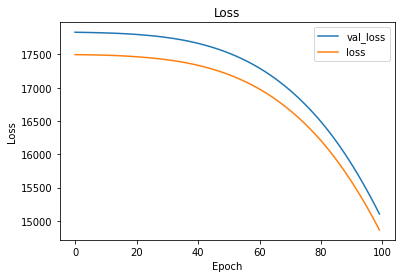

In [106]:
plt.plot(wind.history['val_loss'], label='val_loss')
plt.plot(wind.history['loss'], label='loss')
plt.title("Loss")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [107]:
# Creating another neural network with a target of the DBP for the PPG_Windows
x3 = ppg_window
y3 = dbp
x3 = np.expand_dims(x3, axis=2)
y3 = np.expand_dims(y3, axis=1)

x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size = 0.3)
x_valid3, x_test3, y_valid3, y_test3 = train_test_split(x_test3, y_test3, test_size = 0.5)

In [108]:
n_timestepsDBP, n_featuresDBP, n_outputsDBP = x_train2.shape[1], x_train2.shape[2], y_train2.shape[1]

In [109]:
dbp_inputs = Input(shape=(n_timestepsDBP, n_featuresDBP), name='InputDBP')
batch_n1 = BatchNormalization()(dbp_inputs)
conv1 = Conv1D(filters = 256, kernel_size = 1, activation = 'relu')(batch_n1)
pool1 = MaxPooling1D(pool_size = 2)(conv1)
dense1 = Dense(3, activation='relu')(pool1)
conv2 = Conv1D(input_shape=(n_timestepsDBP, n_outputsDBP), filters = 64, kernel_size = 1, activation = 'relu')(dense1)
pool2 = MaxPooling1D(pool_size = 2)(conv2)
conv3 = Conv1D(input_shape=(n_timestepsDBP, n_outputsDBP), filters=128, kernel_size = 1, activation = 'relu')(pool2)
pool3 = MaxPooling1D(pool_size = 2)(conv3)
conv4 = Conv1D(input_shape=(n_timestepsDBP, n_outputsDBP), filters=128, kernel_size = 1, activation = 'relu')(pool3)
pool4 = MaxPooling1D(pool_size = 2)(conv4)
flat2 = Flatten()(pool4)
dense2 = Dense(64, activation='relu')(flat2)
output1 = Dense(n_outputsDBP, activation='linear', name='outputDBP')(dense2)
window2 = Model(inputs = dbp_inputs, outputs = output1, name='DBP')
print(window2.summary())

Model: "DBP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputDBP (InputLayer)        [(None, 180, 1)]          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 180, 1)            4         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 180, 256)          512       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 90, 256)           0         
_________________________________________________________________
dense_48 (Dense)             (None, 90, 3)             771       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 90, 64)            256       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 45, 64)            0       

In [110]:
window2.compile(optimizer=optConvSBP, loss="mse")
wind2 = window2.fit(x_train2, y_train2, validation_data = (x_test2, y_test2), batch_size = 1, epochs=10)

Epoch 1/10
236/236 [==============================] - 1s 2ms/step - loss: 17343.8105 - val_loss: 17360.7910
Epoch 2/10
236/236 [==============================] - 0s 2ms/step - loss: 16231.8848 - val_loss: 15393.3330
Epoch 3/10
236/236 [==============================] - 0s 2ms/step - loss: 13149.4248 - val_loss: 11042.9678
Epoch 4/10
236/236 [==============================] - 0s 2ms/step - loss: 7943.5039 - val_loss: 5239.3086
Epoch 5/10
236/236 [==============================] - 0s 2ms/step - loss: 2819.9863 - val_loss: 1234.1287
Epoch 6/10
236/236 [==============================] - 0s 2ms/step - loss: 452.3687 - val_loss: 137.9574
Epoch 7/10
236/236 [==============================] - 0s 2ms/step - loss: 63.8459 - val_loss: 59.5288
Epoch 8/10
236/236 [==============================] - 0s 2ms/step - loss: 44.2026 - val_loss: 57.5245
Epoch 9/10
236/236 [==============================] - 0s 2ms/step - loss: 43.2765 - val_loss: 56.1333
Epoch 10/10
236/236 [==============================] -

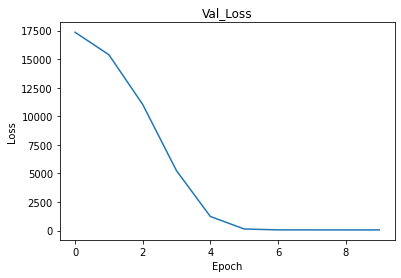

In [111]:
plt.plot(wind2.history['val_loss'])
plt.title("Val_Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [112]:
# Combined Neural Network SBP AND DBP

combined = concatenate([output1, output])
flat3 = Flatten()(combined)
dense5 = Dense(120, activation='relu')(flat3)
dense6 = Dense(240, activation='relu')(dense5)
dense7 = Dense(120, activation='relu')(dense6)
dense8 = Dense(64, activation='linear')(dense7)
concat_out = Dense(2, activation='linear', name='concat_out')(dense8)

concat_model = Model(inputs = [window.input, window2.input], outputs = concat_out, name="Concat_Model")

In [113]:
concat_model.compile(optimizer=optConvSBP, loss='mse')
concat_model.summary()

Model: "Concat_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputDBP (InputLayer)           [(None, 180, 1)]     0                                            
__________________________________________________________________________________________________
InputSBP (InputLayer)           [(None, 180, 1)]     0                                            
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 180, 1)       4           InputDBP[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 180, 1)       4           InputSBP[0][0]                   
_______________________________________________________________________________________

In [114]:
optConc = tf.keras.optimizers.Adam(0.0001)
optConc.learning_rate.assign(0.0001)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1e-04>

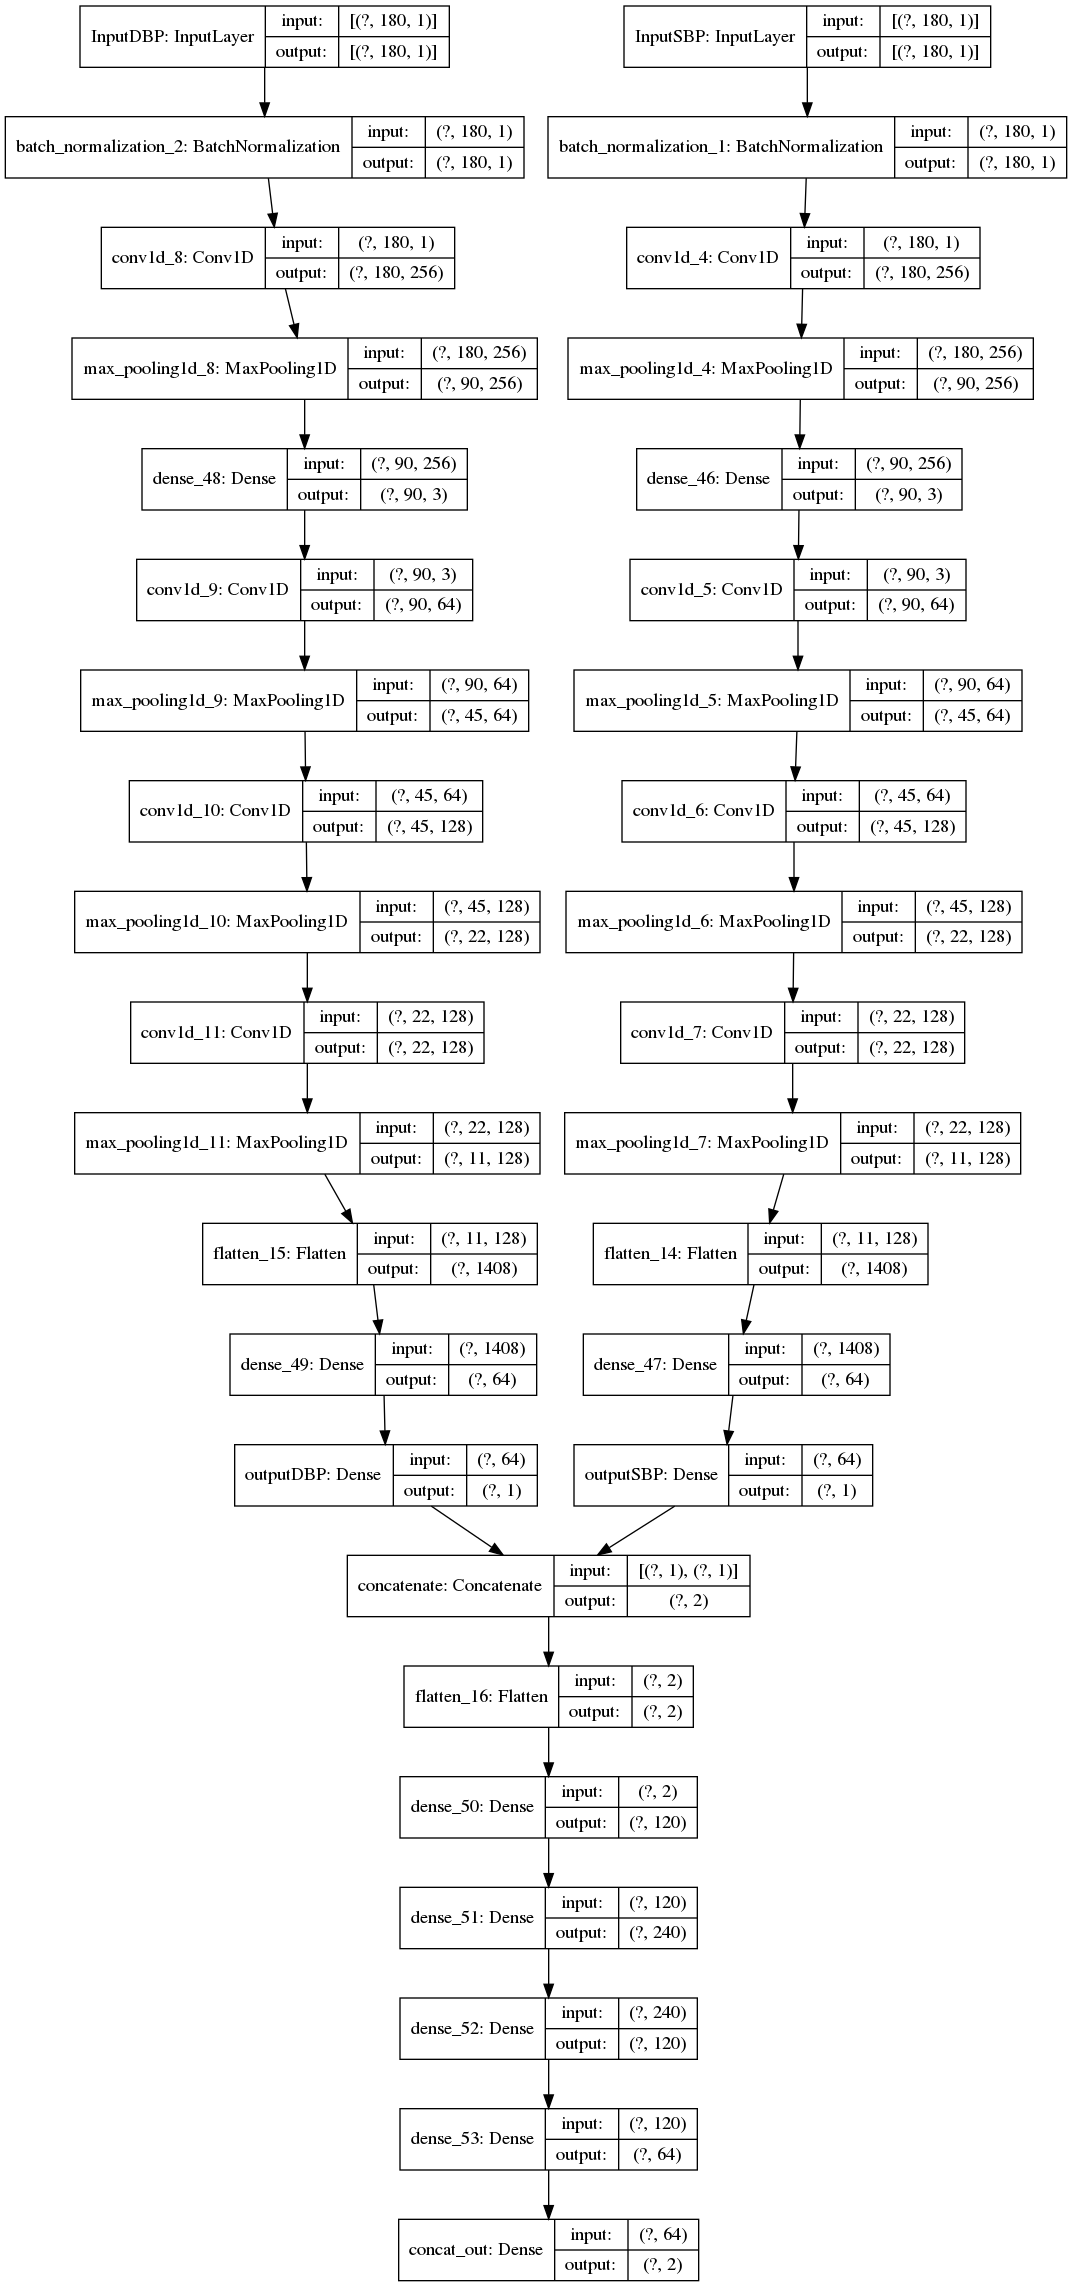

In [115]:
plot_model(concat_model, to_file='concatModel.png', show_shapes=True)

In [117]:
concat_fitted = concat_fit = concat_model.fit([x_train2, x_train3], [y_train2, y_train3], validation_data = ([x_test2, x_test3], [y_test2, y_test3]), epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 13ms/step - loss: 62.2471 - val_loss: 118.6492
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 60.9808 - val_loss: 118.6531
Epoch 3/10
8/8 [==============================] - 0s 13ms/step - loss: 61.8355 - val_loss: 118.4854
Epoch 4/10
8/8 [==============================] - 0s 13ms/step - loss: 63.0605 - val_loss: 118.3294
Epoch 5/10
8/8 [==============================] - 0s 13ms/step - loss: 60.9805 - val_loss: 118.3516
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 59.7608 - val_loss: 118.3556
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 63.1040 - val_loss: 118.4795
Epoch 8/10
8/8 [==============================] - 0s 12ms/step - loss: 61.9310 - val_loss: 118.0399
Epoch 9/10
8/8 [==============================] - 0s 12ms/step - loss: 59.6679 - val_loss: 117.5783
Epoch 10/10
8/8 [==============================] - 0s 13ms/step - loss: 60.2143 - val_loss: 117.7796

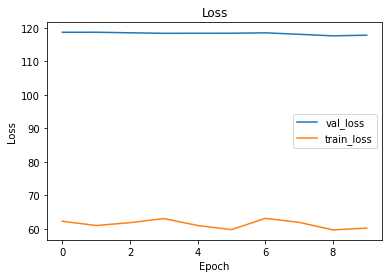

In [143]:
plt.plot(concat_fitted.history['val_loss'], label='val_loss')
plt.plot(concat_fitted.history['loss'], label='train_loss')
plt.legend()
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [119]:
# Combined Neural Network SBP AND DBP

combined2 = concatenate([concat_out, output])
flat4 = Flatten()(combined2)
dense10 = Dense(120, activation='relu')(flat4)
dense11 = Dense(240, activation='relu')(dense10)
dense12 = Dense(120, activation='relu')(dense11)
dense13 = Dense(64, activation='linear')(dense12)
concat_out2 = Dense(2, activation='linear', name='concat_out2')(dense13)

concat_model2 = Model(inputs = [model.input, concat_model.input], outputs = concat_out2, name="Concat_Model2")

In [120]:
concat_model2.compile(optimizer=optConvSBP, loss='mse')
concat_model2.summary()

Model: "Concat_Model2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputDBP (InputLayer)           [(None, 180, 1)]     0                                            
__________________________________________________________________________________________________
InputSBP (InputLayer)           [(None, 180, 1)]     0                                            
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 180, 1)       4           InputDBP[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 180, 1)       4           InputSBP[0][0]                   
______________________________________________________________________________________

In [136]:
concat_fitted2 = concat_model2.fit([x_train, x_train2, x_train3], [y_train, x_train2, y_train3], validation_data = ([x_test2, x_test3], [y_test2, y_test3]), epochs=1000)

ValueError: Data cardinality is ambiguous:
  x sizes: 710, 236, 236
  y sizes: 710, 236, 236
Please provide data which shares the same first dimension.

In [144]:
# need to use VAE to encode down to 236 dimensionality but need to code the encoder and decoder
# MORE IDEAS: train all together vs train all separately FIRST TRY SEPARATELY
# Look around for more ABP and PPG datasets

encoder_input = Input(shape=(5), name='encoder_input')
encoder = Dense(180, activation='linear')(encoder_input)
decoder = Dense(5, activation='linear')(encoder)
autoencoder = Model(encoder_input, decoder, name = 'Autoencoder')

In [145]:
autoencoder.compile(optimizer = 'adam', loss='mse')
autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 5)]               0         
_________________________________________________________________
dense_68 (Dense)             (None, 180)               1080      
_________________________________________________________________
dense_69 (Dense)             (None, 5)                 905       
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


In [146]:
autoencoder.fit(x_train, x_train, epochs=10, validation_data=(x_test, x_test))

Epoch 1/10
23/23 [==============================] - 0s 4ms/step - loss: 628.3855 - val_loss: 21.3950
Epoch 2/10
23/23 [==============================] - 0s 1ms/step - loss: 23.8381 - val_loss: 18.9606
Epoch 3/10
23/23 [==============================] - 0s 1ms/step - loss: 7.8457 - val_loss: 10.1100
Epoch 4/10
23/23 [==============================] - 0s 1ms/step - loss: 5.8118 - val_loss: 8.6646
Epoch 5/10
23/23 [==============================] - 0s 1ms/step - loss: 4.9842 - val_loss: 8.0136
Epoch 6/10
23/23 [==============================] - 0s 1ms/step - loss: 4.4801 - val_loss: 7.3038
Epoch 7/10
23/23 [==============================] - 0s 1ms/step - loss: 4.0173 - val_loss: 6.6859
Epoch 8/10
23/23 [==============================] - 0s 1ms/step - loss: 3.4780 - val_loss: 6.2291
Epoch 9/10
23/23 [==============================] - 0s 1ms/step - loss: 3.1142 - val_loss: 5.8283
Epoch 10/10
23/23 [==============================] - 0s 1ms/step - loss: 2.7928 - val_loss: 5.3663


In [148]:
autoencoder.evaluate(x_test,x_test)

5/5 [==============================] - 0s 551us/step - loss: 5.3663


5.366280555725098

In [150]:
predict_ae = autoencoder.predict(x_train)
print(predict_ae)

[[ 1.5729626 20.507938  59.586544  59.847965   3.3607094]
 [ 1.8474774 21.656454  61.288998  61.836098   3.4602895]
 [ 1.6897428 21.36047   61.674618  61.90537    3.2629926]
 ...
 [ 4.6681    17.415937  50.47529   60.237885   6.497657 ]
 [ 0.2809908 15.067278  45.356052  43.140953   1.4630122]
 [ 1.5141729 21.056805  62.04635   61.959373   3.0920386]]


In [151]:
x_train

array([[ 1.65982405, 20.        , 60.        , 60.        ,  3.46367612],
       [ 1.80449658, 22.        , 61.        , 62.        ,  3.54202107],
       [ 1.85532747, 21.        , 62.        , 62.        ,  3.28866761],
       ...,
       [ 0.80742913,  1.        , 53.        , 76.        ,  2.92635773],
       [ 1.29325513, 17.        , 46.        , 40.        ,  2.14500373],
       [ 1.84066471, 20.        , 63.        , 62.        ,  3.06940364]])

In [154]:
x_trainAE = autoencoder.layers[1].output

In [155]:
np.shape(x_trainAE)

TensorShape([None, 180])

In [142]:
np.shape(x_train3) # DBP

(236, 180, 1)

In [157]:
np.shape(x_train) # FEATURES

(710, 5)

In [156]:
np.shape(x_train2) # SBP

(236, 180, 1)